In [27]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

The first step is to load the dataset and have a general overview of the dataset

In [4]:
# Loading the dataset 
weather_df = pd.read_csv("../Datasets/1. Weather Data.csv")
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### 1. Data Overview and Cleaning 
___ 
At this stage, we shall;
- Look at the key characteristics of the dataset (E.g., No. of records, features, and datatypes).
- Identify and handle any missing and null values.
- Check for and any duplicate records.

In [5]:
# Getting the No. of records in the dataset 
len(weather_df)

8784

In [6]:
# Looking at the features in the dataset 
weather_df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [7]:
# Looking at the different datatypes in the dataset 
weather_df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [8]:
# Looking at the shape of the dataset
weather_df.shape 

(8784, 8)

The dataset has;

- 8,784 Rows 

- 8 Columns

In [9]:
# Identifying missing of NULL values in the dataset 
weather_df.isnull().any()

Date/Time           False
Temp_C              False
Dew Point Temp_C    False
Rel Hum_%           False
Wind Speed_km/h     False
Visibility_km       False
Press_kPa           False
Weather             False
dtype: bool

- The dataset does not have any missing or null values

In [16]:
# Checking for duplicate ROWS

num_duplicates = weather_df.duplicated().sum()

print("Number of duplicate ROWS: {}".format(num_duplicates))


Number of duplicate ROWS: 0


- There are no duplicates in the dataset

### 2. Statistical Summary
___ 
- Provide statistical summary of dataset (mean, median, std) for numeric features 
- Identify and describe any significant outliers in the dataset

In [17]:
# Summary Statistics 

weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


<Axes: >

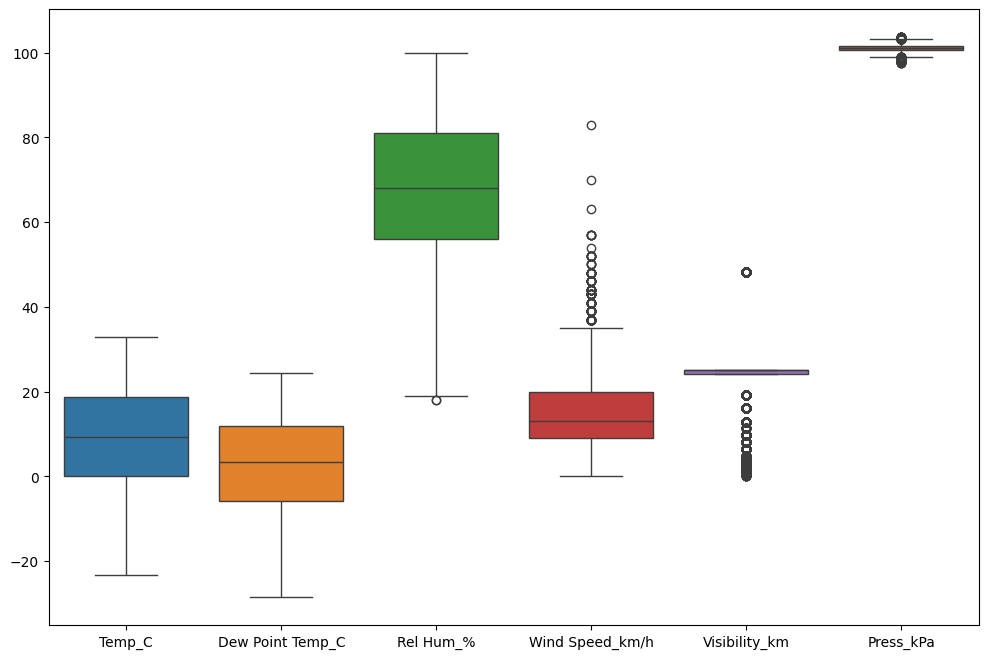

In [28]:
# Discovering outliers in the dataset using Boxplots 
plt.figure(figsize=(12,8))

sns.boxplot(data=weather_df)

- From the Boxplots, we can see that only three columns (Wind Speed_km/h, Visibility, Press_kPa) tend to have outliers.

- We shall address these outliers as follows

A. Using IQR to identify and address the outliers "Wind Speed_km/h" column

In [60]:
# Using IQR to identify and address the outliers "Wind Speed_km/h" column

Q1 = weather_df["Wind Speed_km/h"].quantile(0.25) # Lower quartile 
Q3 = weather_df["Wind Speed_km/h"].quantile(0.75) # Upper quartile 

# Inter Quartile Range
IQR = Q3 - Q1

# finding the lower and upper bounds for outliers 
lower_bound = Q1 - IQR * 1.5 
upper_bound = Q3 + IQR * 1.5

# Removing the outliers 
cleaned_weather_df = weather_df[(weather_df["Wind Speed_km/h"] >= lower_bound) & (weather_df["Wind Speed_km/h"] <= upper_bound)]

(8622, 8)

<Axes: ylabel='Wind Speed_km/h'>

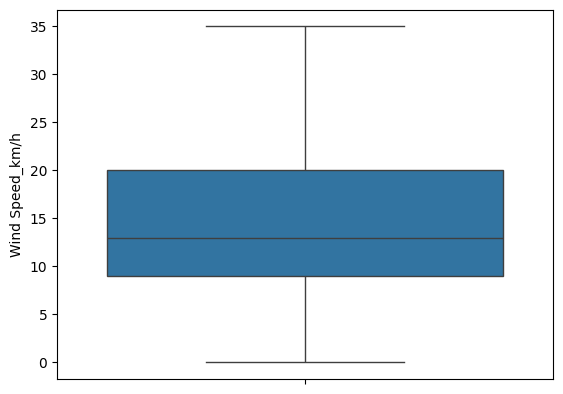

In [63]:
# Confirming tha outliers were removed from the "Wind Speed_km/hr" column using boxplots
sns.boxplot(data=cleaned_weather_df["Wind Speed_km/h"], orient="v")